# 04. 분류모델

유방암 여부를 분류하는 문제를 다양한 분류모델을 활용하여 해결해봅니다.

* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
  
  
  
  
  
* **환경설정**:  
 1) xgboost설치
  - Anaconda Prompt실행
  - 설치명령어:conda install -c anaconda py-xgboost
  
 2) lightgbm설치
  - Visual Studio Build tool 2015 이상 설치
  - 설치명령어:conda install -c conda-forge lightgbm

 3) 설치 여부 확인    
  import xgboost  
  print(xgboost.__version__)

In [2]:
import xgboost
import lightgbm

In [3]:
print(xgboost.__version__)

1.3.3


In [4]:
print(lightgbm.__version__)

3.2.1


## Step0. 준비

### 라이브러리 로딩

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings   # warnings 메세지 안보기
warnings.filterwarnings('ignore')

### 데이터 로딩

In [7]:
breast_cancer = load_breast_cancer()

In [8]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['label'] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Step1. 데이터 전처리

### [Q1] 분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [13]:
# 데이터프레임의 요약 정보
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### [Q2] 분석할 데이터의 통계정보를 살펴보세요

In [14]:
# 데이터프레임의 통계 정보 
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### [Q3] 분석할 타겟('label')은 몇 가지 종류로 구성되어 있습니까?

In [15]:
# 품종(label) 카테고리 확인
breast_cancer_df['label'].unique()

array([0, 1])

### [Q4] 분석할 데이터에 결측치가 있는지 확인하고, 결측치가 있는 데이터는 삭제하세요

In [18]:
# 결측치 확인
breast_cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### [Q5] 분석할 데이터를 train_test_split()함수를 사용하여 학습용과 테스트용으로 나누세요

In [19]:
X = breast_cancer_df.iloc[:, :30]
y = breast_cancer_df['label']

from sklearn.model_selection import train_test_split
# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
len(X_train)

426

In [21]:
len(X_test)

143

## Step2. 학습/예측/평가

### [Q6] 분석할 데이터를 DecisionTreeClassifier를 사용하여 학습하고, 테스트 셋을 사용하여 정확도를 확인하세요

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=10)

# 학습 수행 
# 학습을 해라 명령하는 것
dt_model.fit(X_train, y_train)

# 예측
pred = dt_model.predict(X_test)

#평가
accuracy = accuracy_score(y_test , pred)

print('DecisionTreeClassifer 정확도: {0:.4f}'.format(accuracy))

'''  #  주석 한번에 여러개 하고 싶을때 땡땡땡
코드를 작성하세요

(참고)
# DecisionTree Classifier 생성
dt_model = DecisionTreeClassifier(random_state=10)
# DecisionTreeClassifer 학습. 
dt_model.fit(X_train , y_train)
# DecisionTreeClassifer 예측
pred = dt_model.predict(X_test)
# DecisionTreeClassifer 평가
accuracy = accuracy_score(y_test , pred)
print('DecisionTreeClassifer 정확도: {0:.4f}'.format(accuracy))
'''

DecisionTreeClassifer 정확도: 0.9091


"\n코드를 작성하세요\n\n(참고)\n# DecisionTree Classifier 생성\ndt_model = DecisionTreeClassifier(random_state=10)\n# DecisionTreeClassifer 학습. \ndt_model.fit(X_train , y_train)\n# DecisionTreeClassifer 예측\npred = dt_model.predict(X_test)\n# DecisionTreeClassifer 평가\naccuracy = accuracy_score(y_test , pred)\nprint('DecisionTreeClassifer 정확도: {0:.4f}'.format(accuracy))\n"

### [Q7] 분석할 데이터를 다양한 분류기를 사용하여 학습하고, 테스트 셋을 사용하여 정확도를 확인하세요 
* KNeighborsClassifier
* SVM
* RandomForestClassifier
* LogisticRegression
* GradientBoostingClassifier
* XGBClassifier
* LGBMClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 바로 위에꺼 임포트

# 생성
kn_model = KNeighborsClassifier()

# 학습
kn_model.fit(X_train, y_train)

# 예측
pred = kn_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('KNeighborsClassifier 정확도: {0:.4f}'.format(accuracy))





'''
코드를 작성하세요
'''  

KNeighborsClassifier 정확도: 0.9091


'\n코드를 작성하세요\n'

In [25]:
svc_model = SVC()

# 학습
svc_model.fit(X_train, y_train)

# 예측
pred = svc_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('svc 정확도: {0:.4f}'.format(accuracy))



svc 정확도: 0.9021


In [26]:
rf_model = RandomForestClassifier()

# 학습
rf_model.fit(X_train, y_train)

# 예측
pred = rf_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy))

RandomForestClassifier 정확도: 0.9650


In [27]:
lg_model = LogisticRegression()

# 학습
lg_model.fit(X_train, y_train)

# 예측
pred = lg_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('LogisticRegression 정확도: {0:.4f}'.format(accuracy))

LogisticRegression 정확도: 0.9301


In [28]:
gbc_model = GradientBoostingClassifier()

# 학습
gbc_model.fit(X_train, y_train)

# 예측
pred = gbc_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('GradientBoostingClassifier 정확도: {0:.4f}'.format(accuracy))

GradientBoostingClassifier 정확도: 0.9580


In [29]:
xgbc_model = XGBClassifier()

# 학습
xgbc_model.fit(X_train, y_train)

# 예측
pred = xgbc_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('XGBClassifier 정확도: {0:.4f}'.format(accuracy))

[14:43:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 정확도: 0.9790


In [30]:
lgbmc_model = LGBMClassifier()

# 학습
lgbmc_model.fit(X_train, y_train)

# 예측
pred = lgbmc_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test , pred)

print('LGBMClassifier 정확도: {0:.4f}'.format(accuracy))

LGBMClassifier 정확도: 0.9580


In [56]:
# 위에 과정을 for 문 돌려서 한번에!

model_list = [kn_model, svc_model, rf_model, lg_model, gbc_model, xgbc_model, lgbmc_model]

for model in model_list:
    # 학습
    model.fit(X_train , y_train)
    
    # 예측
    pred = model.predict(X_test)
    
    # 평가
    accuracy = accuracy_score(y_test, pred)
    
    model_name = model.__class__.__name__
    print('{0} 정확도: {1}\n'.format(model_name, accuracy)) 
    

KNeighborsClassifier 정확도: 0.9090909090909091

SVC 정확도: 0.9020979020979021

RandomForestClassifier 정확도: 0.951048951048951

LogisticRegression 정확도: 0.9300699300699301

GradientBoostingClassifier 정확도: 0.951048951048951

[15:11:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 정확도: 0.9790209790209791

LGBMClassifier 정확도: 0.958041958041958



### xgboost의 feature 중요도를 시각화 하세요
아래 코드를 실행시켜 보세요

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

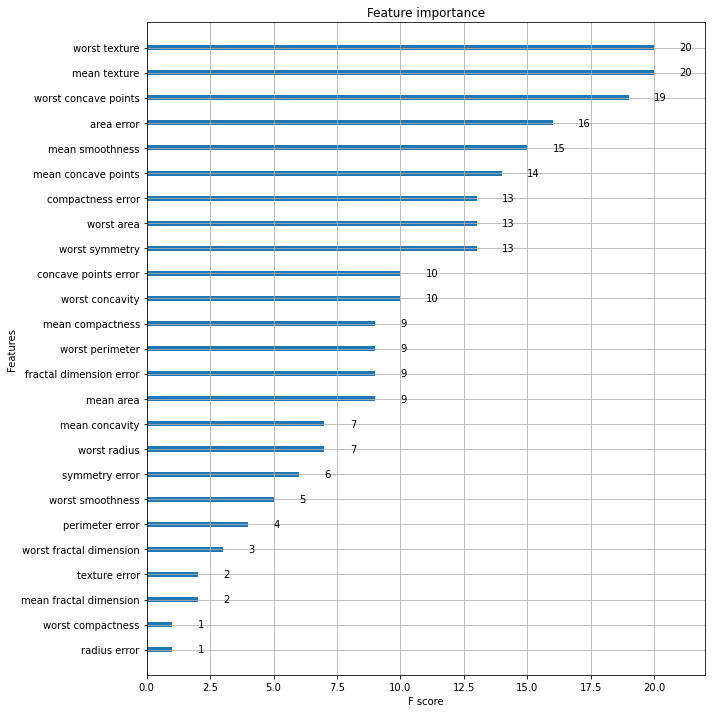

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgbc_model, ax=ax)

### lightgbm의 feature 중요도를 시각화 하세요
아래 코드를 실행시켜 보세요

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

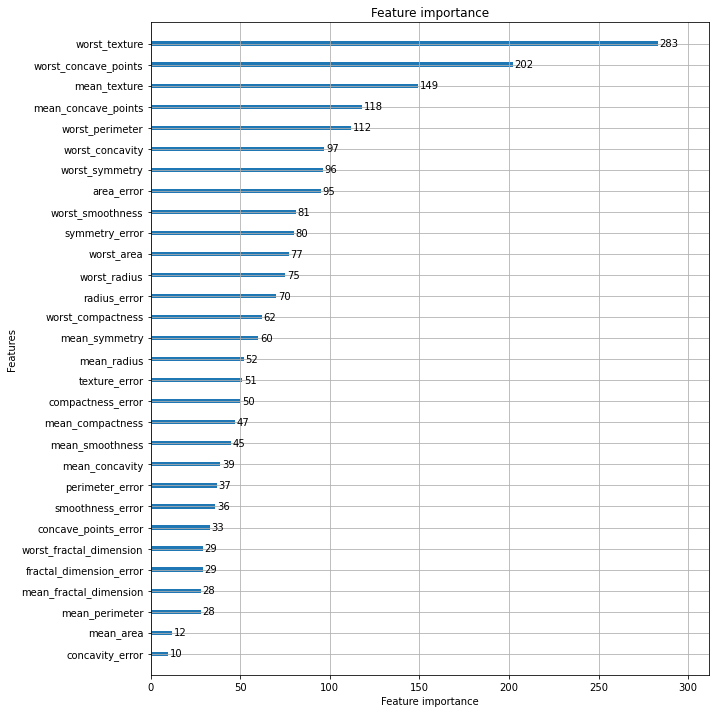

In [45]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbmc_model, ax=ax)

### 각 모델의  혼동행렬, 정확도, 정밀도, 재현율, F1 score, AUC를 구하세요
 아래 함수를 사용하세요

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


# 이거 함수 복사해서 분류기 만들때 쓰자
def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('혼동행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [48]:
# 아까 내가 만든 변수들이랑 이름을 맞춰주어야 실행된다
model_list = [kn_model, svc_model, rf_model, lg_model, gbc_model, xgbc_model, lgbmc_model]

for model in model_list:
    model.fit(X_train , y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    model_name = model.__class__.__name__
    print('\n{0} 정확도:'.format(model_name)) 
    get_clf_eval(y_test, pred)


KNeighborsClassifier 정확도:
혼동행렬
[[42  7]
 [ 6 88]]
정확도: 0.9091, 정밀도: 0.9263, 재현율: 0.9362, F1: 0.9312

SVC 정확도:
혼동행렬
[[37 12]
 [ 2 92]]
정확도: 0.9021, 정밀도: 0.8846, 재현율: 0.9787, F1: 0.9293

RandomForestClassifier 정확도:
혼동행렬
[[46  3]
 [ 4 90]]
정확도: 0.9510, 정밀도: 0.9677, 재현율: 0.9574, F1: 0.9626

LogisticRegression 정확도:
혼동행렬
[[40  9]
 [ 1 93]]
정확도: 0.9301, 정밀도: 0.9118, 재현율: 0.9894, F1: 0.9490

GradientBoostingClassifier 정확도:
혼동행렬
[[47  2]
 [ 4 90]]
정확도: 0.9580, 정밀도: 0.9783, 재현율: 0.9574, F1: 0.9677
[14:57:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier 정확도:
혼동행렬
[[47  2]
 [ 1 93]]
정확도: 0.9790, 정밀도: 0.9789, 재현율: 0.9894, F1: 0.9841

LGBMClassifier 정확도:
혼동행렬
[[46  3]
 [ 3 91]]
정확도: 0.9580, 정밀도: 0.9681, 재현율: 0.9681, F1: 0.9681


## Step3. 성능 개선

### [Q8] 학습 조기 종료 방법을 사용하여 XGBClassifier의 성능을 개선하세요
 * (힌트) fit함수의 early_stopping_rounds 파라미터를 셋팅
 * fit함수의 verbose=True로 설정하여 학습 상태를 확인해봅니다 

In [60]:
from xgboost import XGBClassifier



xgb_model2 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]   # 테스트 셋을 평가할 때 쓰려고 할당해줌
xgb_model2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
# early_stopping_rounds: 과적합 생길때, 100번정도 해보고 성능이 개선되지 않으면 중지해라 *중요
# eval_set: 평가 셋을 같이 지정해주어야 함 *중요
# verbose = True: 내가 학습하는 동안 어떤일이 있는지 다 로그로 남겨줘!
# eval_metric = 'logloss'  로그로스로 매트릭을 해준다 정도만 알자

xgb_pred = xgb_model2.predict(X_test)             # X_test 가지고 비교해보겠다
xgb_accuracy = accuracy_score(y_test, xgb_pred)   # y와 y^ 비교
print('XGBoost EarlyStopping 정확도: {0:.4f}'.format(xgb_accuracy))

# 
# '''
# 코드를 작성하세요

# (참고)
# xgb_model2 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
# evals = [(X_test, y_test)]
# xgb_model2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
# xgb_pred = xgb_model2.predict(X_test)
# xgb_accuracy = accuracy_score(y_test, xgb_pred)
# print('XGBoost EarlyStopping 정확도: {0:.4f}'.format(xgb_accuracy))
# '''

[0]	validation_0-logloss:0.61844
[1]	validation_0-logloss:0.55611
[2]	validation_0-logloss:0.50664
[3]	validation_0-logloss:0.46565
[4]	validation_0-logloss:0.43084
[5]	validation_0-logloss:0.40050
[6]	validation_0-logloss:0.36816
[7]	validation_0-logloss:0.34601
[8]	validation_0-logloss:0.32230
[9]	validation_0-logloss:0.30553
[10]	validation_0-logloss:0.28454
[11]	validation_0-logloss:0.27053
[12]	validation_0-logloss:0.25467
[13]	validation_0-logloss:0.23852
[14]	validation_0-logloss:0.22588
[15]	validation_0-logloss:0.21366
[16]	validation_0-logloss:0.20673
[17]	validation_0-logloss:0.19788
[18]	validation_0-logloss:0.18866
[19]	validation_0-logloss:0.18030
[20]	validation_0-logloss:0.17261
[21]	validation_0-logloss:0.16585
[22]	validation_0-logloss:0.16241
[23]	validation_0-logloss:0.15610
[24]	validation_0-logloss:0.15306
[25]	validation_0-logloss:0.14910
[26]	validation_0-logloss:0.14411
[27]	validation_0-logloss:0.13965
[28]	validation_0-logloss:0.13569
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08301
[239]	validation_0-logloss:0.08289
[240]	validation_0-logloss:0.08292
[241]	validation_0-logloss:0.08293
[242]	validation_0-logloss:0.08292
[243]	validation_0-logloss:0.08298
[244]	validation_0-logloss:0.08294
[245]	validation_0-logloss:0.08302
[246]	validation_0-logloss:0.08305
[247]	validation_0-logloss:0.08306
[248]	validation_0-logloss:0.08302
[249]	validation_0-logloss:0.08290
[250]	validation_0-logloss:0.08296
[251]	validation_0-logloss:0.08299
[252]	validation_0-logloss:0.08298
[253]	validation_0-logloss:0.08307
[254]	validation_0-logloss:0.08303
[255]	validation_0-logloss:0.08304
[256]	validation_0-logloss:0.08306
[257]	validation_0-logloss:0.08296
[258]	validation_0-logloss:0.08304
[259]	validation_0-logloss:0.08300
[260]	validation_0-logloss:0.08306
[261]	validation_0-logloss:0.08300
[262]	validation_0-logloss:0.08301
[263]	validation_0-logloss:0.08301
[264]	validation_0-logloss:0.08303
[265]	validation_0-logloss:0.08293
[266]	validation_0-l

### [Q9] 학습 조기 종료 방법을 사용하여 LGBMClassifier 성능을 개선하세요
 * (힌트) fit함수의 early_stopping_rounds 파라미터를 셋팅
 * fit함수의 verbose=True로 설정하여 학습 상태를 확인해봅니다 

In [62]:
from lightgbm import LGBMClassifier

lgbmc_model2 = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
lgbmc_model2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
lgbmc_pred = lgbmc_model2.predict(X_test)             # X_test 가지고 비교해보겠다
lgbmc_accuracy = accuracy_score(y_test, xgb_pred)   # y와 y^ 비교
print('XGBoost EarlyStopping 정확도: {0:.4f}'.format(xgb_accuracy))



'''
코드를 작성하세요
'''  

[1]	valid_0's binary_logloss: 0.575095
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.51636
[3]	valid_0's binary_logloss: 0.469691
[4]	valid_0's binary_logloss: 0.430081
[5]	valid_0's binary_logloss: 0.39832
[6]	valid_0's binary_logloss: 0.367495
[7]	valid_0's binary_logloss: 0.340605
[8]	valid_0's binary_logloss: 0.318176
[9]	valid_0's binary_logloss: 0.296915
[10]	valid_0's binary_logloss: 0.279085
[11]	valid_0's binary_logloss: 0.264828
[12]	valid_0's binary_logloss: 0.249188
[13]	valid_0's binary_logloss: 0.23711
[14]	valid_0's binary_logloss: 0.223869
[15]	valid_0's binary_logloss: 0.215031
[16]	valid_0's binary_logloss: 0.207564
[17]	valid_0's binary_logloss: 0.197479
[18]	valid_0's binary_logloss: 0.189552
[19]	valid_0's binary_logloss: 0.183074
[20]	valid_0's binary_logloss: 0.174738
[21]	valid_0's binary_logloss: 0.171483
[22]	valid_0's binary_logloss: 0.163468
[23]	valid_0's binary_logloss: 0.161389
[24]	valid_0's binary_logloss:

'\n코드를 작성하세요\n'

### [Q10] VotingClassifier를 사용해서 앙상블 모델을 생성/학습/평가하세요.
 * 개별 모델 : LogisticRegression, KNeighborsClassifier 조합
 * voting='soft'

In [54]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier( estimators=[('LR',lg_model),('KNN',kn_model)] , voting='soft' )
# 하나는 로지스틱 모델, 하나는 knn 모델 이 2개를 앙상블(조합)해서 만들겠다!
# 클래시파이 하는 법이 좀 다름

voting_model.fit(X_train , y_train)
pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('VotingClassifier 정확도: {0:.4f}'.format(accuracy))



# '''
# 코드를 작성하세요
# voting_model = VotingClassifier( estimators=[('LR',logistic_model),('KNN',neighbor_model)] , voting='soft' )
# voting_model.fit(X_train , y_train)
# pred = voting_model.predict(X_test)
# accuracy = accuracy_score(y_test , pred)
# print('VotingClassifier 정확도: {0:.4f}'.format(accuracy))
# '''  

VotingClassifier 정확도: 0.9441


### [Q11] GridSearchCV를 사용해서 RandomForestClassifier의 하이퍼파라미터를 튜닝하세요
 *     'n_estimators':[100],
 *   'max_depth' : [6, 8, 10, 12], 
 *   'min_samples_leaf' : [8, 12, 18 ],
 *   'min_samples_split' : [8, 16, 20]

In [86]:
from sklearn.model_selection import GridSearchCV
# 최적의 하이퍼파라미터를 찾아준다..

# 나무를 100개정도 만들고 깊이, 나뭇잎 등등을 아래처럼 해보겠다. 깊이는 6,8,10,12로 해보고
# 나뭇잎은 8, 12, 18로 해보고 split도 8, 16, 20 해보고
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}



# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model = RandomForestClassifier()

grid_rf = GridSearchCV(rf_model, param_grid=params, cv=3)
# 학습해라
grid_rf.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_rf.cv_results_)
scores_df.head(1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102689,0.004916,0.007668,0.000479,6,8,8,100,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.950704,0.93662,0.964789,0.950704,0.0115,15


In [84]:
# grid_rf.best_estimator_

print('최적 하이 파라미터:', grid_rf.best_params_)

최적 하이 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}


### [Q12] GridSearchCV를 사용해서 GBM의 하이퍼파라미터를 튜닝하세요
    * 'n_estimators':[100, 500],
    * 'learning_rate' : [ 0.05, 0.1]

In [75]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}

gbm_model = GradientBoostingClassifier()

grid_gbm = GridSearchCV(gbm_model, param_grid=params, cv=3)
# 학습해라
grid_gbm.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_gbm.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.335740,0.011955,0.003669,0.000943,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.950704,0.943662,0.957746,0.950704,0.00575,2
1,1.605390,0.022198,0.003331,0.000474,0.05,500,"{'learning_rate': 0.05, 'n_estimators': 500}",0.950704,0.950704,0.936620,0.946009,0.00664,3
2,0.321074,0.021276,0.003340,0.000947,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.964789,0.950704,0.950704,0.955399,0.00664,1
3,1.328958,0.301245,0.003000,0.000806,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.957746,0.943662,0.922535,0.941315,0.01447,4


In [77]:
print('최적 하이 파라미터:', grid_gbm.best_params_)

print('최고 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

최적 하이 파라미터: {'learning_rate': 0.1, 'n_estimators': 100}
최고 예측 정확도: 0.9580
